# Exercise Set 3: Strings, requests and APIs

*Morning, August 13, 2019*

In this exercise set you will be working with collecting from the web. We will start out with some basic string operations and build on that to make a query for fetching data.

In addition to DataCamp, you might find [this page](https://pythonprogramming.net/string-concatenation-formatting-intermediate-python-tutorial/) on pythonprogramming.net useful. [This page](https://www.python-course.eu/python3_sequential_data_types.php) give an introduction to the basics of strings and their related data types. 

## Exercise Section 3.1: Basic string operations and dictionaries

Strings have multiple operations and functions associated. In this exercise we investigate a few of these. We also explore the sequence form of a string and how it can be sliced and accessed via indices.

> **Ex. 3.1.1**: Let `s1='Chameleon'` and `s2='ham'`. Check whether the string `s2` is a substring of `s1`. Is `'hello'` a substring `'goodbye'`?

> *Hint*: One string operation is to check whether a string `S` contains a substring `T`, this can be done with the `in` operator: `S in T`. 

In [2]:
# [Answer to Ex. 3.1.1]
s1 = 'Chameleon'
s2 = 'ham'
print('Check if substring is found within string:',s2 in s1)
print('Check if substring is found within string:','hello' in 'goodbye')

Check if substring is found within string: True
Check if substring is found within string: False


> **Ex. 3.1.2**: From the string `s1` select the last four characters. What is the index of the character `a` in `s1`?

> *Hint*: We can selecting a substring by slicing it with the `[]` notation, from the start to end where start is included and end is excluded. Recall that Python has zero-based indexing, see explanation [here](https://softwareengineering.stackexchange.com/questions/110804/why-are-zero-based-arrays-the-norm).


In [5]:
# [Answer to Ex. 3.1.2]
# Selecting last 4 characters of string, remember last character has the position n-1 where n is length of the string
s1[-4:]

'leon'

In addition to the techniques above strings are equipped with an array of _methods_, for solving more complex tasks. For example the `str.join(list)` method will insert a string in between each element of a list. Oppositely `str1.split(str2)` splits `str1` into a list. `.strip()` removes spaces in the beginning and end of a word and `.format()` fills in specified blanks in a string.  Below we illustrate the use of each function

```python
>>> ','.join(['a','b']) 
'a,b'

>>> ' Hello World! '.strip() 
'Hello World!'

>>> 'Hello {w}'.format(w='World!') 
'Hello World!'

>>> 'a,b,c'.split(',') 
['a','b','c']
```

> **Ex. 3.1.3:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence "Is r > g?" using your knowledge about string formatting. Make sure there is only one space in between worlds.
>
>> _Hint:_ You should be able to combine the above informations to solve this exercise.

In [24]:
# [Answer to Ex. 3.1.3]
l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']
print(l1[1], l1[0].strip(), ' '.join(l1[2]), l1[4].strip()+ l1[-1]) #The comma inserts space by default. 

Is r > g?


### Dictionaries

Dictionaries (or simply dicts) are a central building block of python. Python dicts are constructed from pairs of keys and values making them extremely versatile for data storage. Furthermore dicts correspond directly to the json file format.  

> **Ex. 3.1.4**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`
>
>> _Hint:_ You might want co first construct a function that asseses whether a given word begins with a vowel or not.

In [55]:
# [Answer to Ex. 3.1.4]
keys = ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']
vowels = ['a','e','i','o','u','y']
value = []

for x in keys:
    value.append(x[0] in vowels)

words = dict(list(zip(keys,value)))
print(words)



{'animal': True, 'coffee': False, 'python': False, 'unit': True, 'knowledge': False, 'tread': False, 'arise': True}


> **Ex. 3.1.5:** Loop through the dictionary `words`. In each iteration you should print a proper sentence stating if the current word begins with a vowel or not. 

> _Hint:_ You can loop through both keys and values simultaneously with the `.items()` method. [This](https://www.tutorialspoint.com/python/python_dictionary.htm) might help you.

In [79]:
# [Answer to Ex. 3.1.5]
for x in words.items(): #.items() shows both keys and values as a tuple.
    if x[1] == True:
        print('The word',x[0], 'starts with a vowel.')
    else: 
        print('The word',x[0], 'does NOT start with a vowel.')


The word animal starts with a vowel.
The word coffee does NOT start with a vowel.
The word python does NOT start with a vowel.
The word unit starts with a vowel.
The word knowledge does NOT start with a vowel.
The word tread does NOT start with a vowel.
The word arise starts with a vowel.


<br>

## Exercise Section 3.2: The punk API
The [punk API](https://punkapi.com/) serves information about _beers_. It is a well made and well documented API which makes it great for learning about APIs. 

> **Ex. 3.2.1:** Read the documentation on the Punk API available [here](https://punkapi.com/documentation/v2). What is the server url (i.e. root endpoint) of the Punk API? Does it require authentication? Then use the Punk API to make a request for beers brewed before December, 2008 with an ABV of at least 8.

In [292]:
# [Answer to Ex. 3.2.1]
# The root endpoint of the PUNK API is https://api.punkapi.com/v2/
# It does not rely on authentication but instead on rate limits at 1 request per second.
import requests
import pprint

root = 'https://api.punkapi.com/v2/beers' # root of API
param = '?brewed_before=12-2008&abv_gt=8' # curl with designated parameters
url = root + param # concatenating url
fetch = requests.get(url) # fetching query
pprint.pprint(fetch.json()) # printing query in a more readable format






[{'abv': 12.5,
  'attenuation_level': 81.2,
  'boil_volume': {'unit': 'litres', 'value': 25},
  'brewers_tips': 'Rack into a secondary fermenter and add your strawberries. '
                  'Use a blow-off rather than an airlock as the fermentation '
                  'can get pretty wild as the yeast starts using the sugar '
                  'from the strawberries.',
  'contributed_by': 'Sam Mason <samjbmason>',
  'description': 'A 9.2% Double IPA aged for 21 months in a 1965 Invergordon '
                 'cask with 30 kg of fresh highland strawberries. This beer is '
                 'a riot of whisky, caramel and strawberry, all tempered by a '
                 'toe curling bitterness enducing rapture in all who taste it. '
                 'Who needs champagne?',
  'ebc': 40,
  'first_brewed': '10/2008',
  'food_pairing': ['Poached eggs and smoked salmon',
                   'Salt and pepper squid',
                   'Key Lime Pie'],
  'ibu': 125,
  'id': 37,
  'image_url': 'h

> **Ex. 3.2.2:** What object type is the API's JSON response? What about the individual items in the container? Convert the response object to a suitable format and answer the following questions:
>> 1) How many beers are in the JSON object?
>>
>> 2) Print the names of the beers in the JSON object using lower case characters.
>>
>> 3) Select the beer called Paradox Islay from the JSON object.
>>
>> 4) Which hop ingredients does the Paradox Islay contain?


In [293]:
# [Answer to Ex. 3.2.2]
# The JSON response is a list containing dictionaries. 
# On the lowest level each element is either a string, a float or an integer.

# Getting number of beers
len_fetch = len(fetch.json())
print ('The number of beers with an ABV greater than 8 brewed before December 2008 is', len_fetch)

# Getting name of beers using lowercase characters
print('\nList of beers:')
for x in fetch.json():
    print(x['name'].lower())
    
# Selecting my favourite beer
Paradox_Islay = fetch.json()[1] # hardcoded selection
for x in fetch.json(): # non hardedcoded selection - BETTER
    if x['name'] == 'Paradox Islay':
        Paradox_Islay = x
        
# Printing list of hops
print('\nThe list of hops used:')
for x in Paradox_Islay['ingredients']['hops']:
    print(x['name'], 'with the', x['attribute'],'attribute')
    

The number of beers with an ABV greater than 8 brewed before December 2008 is 4

List of beers:
zephyr
paradox islay
coffee imperial stout
ab:03

The list of hops used:
Columbus with the bitter attribute
Columbus with the flavour attribute
Saaz with the flavour attribute
First Gold with the flavour attribute


> **Ex. 3.2.3:** Save the beers as a JSON file on your machine.

> _Hint:_ you might want to take a look at the [json](https://docs.python.org/3/library/json.html) module.


In [298]:
# [Answer to Ex. 3.2.3]
import json, os
with open('punkAPI.json', 'w') as f:
    f.write(json.dumps(fetch.json()))
    path = os.path.abspath('punkAPI.json')
    directory = os.path.dirname(path)
    print('File saved to', directory)
    

File saved to C:\Users\bjorn\Dropbox\Politstudie\7. semester\Social Data Science\Exercises


<br>

## Exercise Section 3.3: The DST API

DST (Statistics Denmark) provide an API access to their aggregate data. For developers they supply a [console](https://api.statbank.dk/console) for testing. In this exercise we will first code up a simple script which can collect data from the DST API, and then introduce the [PyDST](https://kristianuruplarsen.github.io/PyDST/) package. 

> **Ex 3.3.1:** Use the API console to construct a GET request which retrieves the table FOLK1A split by quarter. The return should be in JSON format. We want all available dates.
>
>Then write a function `construct_link()` which takes as inputs: a table ID (e.g. `'FOLK1A'`) and a list of strings like `['var1=*', 'var2=somevalue']`. The function should return the proper URL for getting a dataset with the specified variables (e.g. in this case all levels of var1, but only where var2=somevalue).

> _Hint:_ The time variable is called 'tid'. To select all available values, set the value-id to '*'. Spend a little time with the console to get a sense of how the URLs are constructed.


In [276]:
# [Answer to Ex. 3.3.1]
import requests, pprint

# Constructing link to table using table ID and variables
def construct_link(table_id, list): 
    root = 'https://api.statbank.dk/v1/data/'
    curl = '/JSONSTAT?'
    for x in list:
        curl += x + '&'
    return root + table_id + curl[:-1]

# Printing link to table data
print(construct_link('FOLK1A',['Tid=*','CIVILTILSTAND=TOT']))

# Fetching table and printing
#fetch = requests.get(construct_link('FOLK1A',var))
#pprint.pprint(fetch.json())

https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?Tid=*&CIVILTILSTAND=TOT


When executing the request in the console you should get a json file as output. Next lets write some code to load these json files directly into python. 


> **Ex. 3.3.2:** use the `requests` module (get it with `pip install requests`) and `construct_link()` to request birth data from the "FOD" table. Get all available years (variable "Tid"), but only female births (BARNKON=P) . Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.

> _Hint:_ The `requests.response` object has a `.json()` method. 

In [368]:
# [Answer to Ex. 3.3.2]

# link to table
url = construct_link('FOD',['Tid=*','BARNKON=P'])

# fetching query
def fetchtable(url):
    fetch = requests.get(url)
    unpack = fetch.json()
    return unpack

#Printing table
pprint.pprint(fetchtable(url))


# Save file
with open('FOD.json', 'w') as f:     
    f.write(json.dumps(fetch.json()))
    path = os.path.abspath('Fod.json')
    directory = os.path.dirname(path)
    print('File saved to', directory)


{'dataset': {'dimension': {'BARNKON': {'category': {'index': {'P': 0},
                                                    'label': {'P': 'Piger'}},
                                       'label': 'barnets køn'},
                           'ContentsCode': {'category': {'index': {'FOD': 0},
                                                         'label': {'FOD': 'Levendefødte'},
                                                         'unit': {'FOD': {'base': 'antal',
                                                                          'decimals': 0}}},
                                            'label': 'Indhold'},
                           'Tid': {'category': {'index': {'1973': 0,
                                                          '1974': 1,
                                                          '1975': 2,
                                                          '1976': 3,
                                                          '1977': 4,
                         

> **Ex. 3.3.3:** Extract the number of girls born each year. Store the results as a list.

In [398]:
# [Answer to Ex. 3.3.3]
# link to table
url = construct_link('FOD',['Tid=*','BARNKON=P'])
keys = fetchtable(url)['dataset']['dimension']['Tid']['category']['index'].keys() # Get years as a list
girlsborn = fetchtable(url)['dataset']['value'] # Store number of girls born each year as a list
barnkon_dict = dict(list(zip(keys,girlsborn))) # Create dictionary

print('Antal levendefødte piger født i år 1973 er', barnkon_dict['1973'])

Antal levendefødte piger født i år 1973 er 34996


> **Ex.3.3.4:** Repeat 3.3.2 and 3.3.3 but this time only get boy births (BARNKON=D). Store the numbers in a new list and use the `plot_births` (supplied below) function to plot the data. If you don't already have matplotlib installed run `pip install matplotlib`.

In [402]:
# Just run this once, do not change it.
import matplotlib.pyplot as plt 

def plot_births(boys, girls):
    """ Plots lineplot of the number of births split by gender.
    
    Args: 
        boys: a list of boy births by year
        girls: a list of girl births by year
    """
    if not len(boys) == len(girls):
        raise ValueError('There must be the same number of observations for boys and girls')
    
    labels = ['{y}'.format(y=year) for year in range(1973,2018)]
    
    plt.plot(range(len(boys)), boys, color = 'blue', label = 'boys')
    plt.plot(range(len(boys)), girls, color = 'red', label = 'girls')
    plt.xticks([i for i in range(len(boys)) if i%4 == 0], [l for i,l in zip(range(len(boys)),labels) if i%4 == 0],
               rotation = 'vertical')
    plt.legend()
    plt.show()

Udpluk af listen af levendefødte piger [34996, 34771, 35260, 31533, 30055]
Udpluk af listen af levendefødte drenge [36899, 36556, 36811, 33734, 31823]


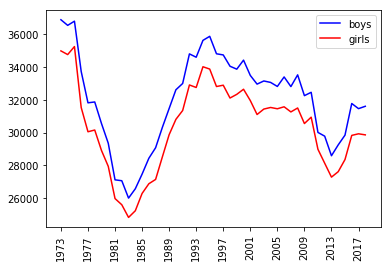

In [403]:
# [Answer to Ex. 3.3.4]

# BCI code
print('Udpluk af listen af levendefødte piger', girlsborn[:5])
url = construct_link('FOD',['Tid=*','BARNKON=D'])
boysborn = fetchtable(url)['dataset']['value'] # Store number of girls born each year as a list
print('Udpluk af listen af levendefødte drenge', boysborn[:5])


# plot births of boys and girls    
plot_births(boys,girls)

>**(Bonus question) Ex. 3.3.5:** Go to [https://kristianuruplarsen.github.io/PyDST/](https://kristianuruplarsen.github.io/PyDST/) follow the installation instructions and import PyDST. Try to replicate the birth figure from 3.3.4 using PyDST. Use [the documentation](https://kristianuruplarsen.github.io/PyDST/connection) to learn how the package works.

> _Hint:_ PyDST does not use json or dicts as its primary data format, instead it uses pandas DataFrames. When you install PyDST it will install pandas as a dependency. If this doesn't work simply run `pip install pandas` in your console. DataFrames are very intuitive to work with, for example accessing a column named 'name' is simply `data['name']` or `data.name`.
>
> In the next session you will learn more about pandas and DataFrames. If you are more comfortable with dicts, the data_response class has a `.dict` method you can use. 

Retrieving data in one package.
Getting table FOD, variables are ['Tid', 'BARNKON']
        values are {'Tid': ['*'], 'BARNKON': ['*']}


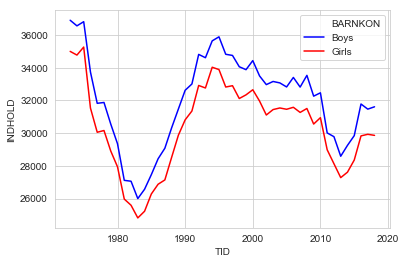

In [25]:
# [Answer to Ex. 3.3.5]
import PyDST
import seaborn as sns; sns.set_style("whitegrid")

conn = PyDST.connection(language = 'en') # Connecting to database

# fetching table
resp = conn.get_data(
                table_id = 'FOD',
                variables = ['Tid', 'BARNKON'], 
                values = {'Tid': ['*'], 'BARNKON': ['*']}
                     )

# convert data query to dataframe
data = resp.df

sns.lineplot(x='TID', y='INDHOLD', data = data, hue = 'BARNKON', markers=True, palette = ['blue', 'red'],)